In [2]:
import sys
import numpy as np
from numpy import linalg

In [3]:
# define array
A = np.arange(9)-3
A


array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [4]:
B = A.reshape((3,3))

B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [5]:
# euclidean l2 norm - default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [6]:
# the frogenius norm is the l2 norm for a matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [8]:
# max norm p = infinity
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


In [9]:
# vector normalization - produce an unit factor
# magnitude
norm = np.linalg.norm(A)
A_u = A / norm
A_u

array([-0.36115756, -0.24077171, -0.12038585,  0.        ,  0.12038585,
        0.24077171,  0.36115756,  0.48154341,  0.60192927])

In [11]:
# magnitude of unit factor is = 1
np.linalg.norm(A_u)

0.9999999999999999

Eigendecomposition process in python

In [12]:
# find the eigenvalue and eigenvector for a simple square matrix
# diagonal matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [13]:
eigenvalue, eigenvectors = np.linalg.eig(A)


In [14]:
eigenvalue

array([1., 2., 3.])

In [15]:
# eigen vectors stored in matrix each column is an eigenvector
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
print("eigenvalue:{}".format(eigenvalue[1]))
print("eigenvectors:{}".format(eigenvectors[:,1]))

eigenvalue:2.0
eigenvectors:[0. 1. 0.]


In [17]:
#  eigen decomposition formula - check the eigenvalue and eigenvectors we have earlier)
matrix = np.matmul(np.diag(eigenvalue), np.linalg.inv(eigenvectors))

In [19]:
output = np.matmul(eigenvectors, matrix).astype(np.int)
output

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

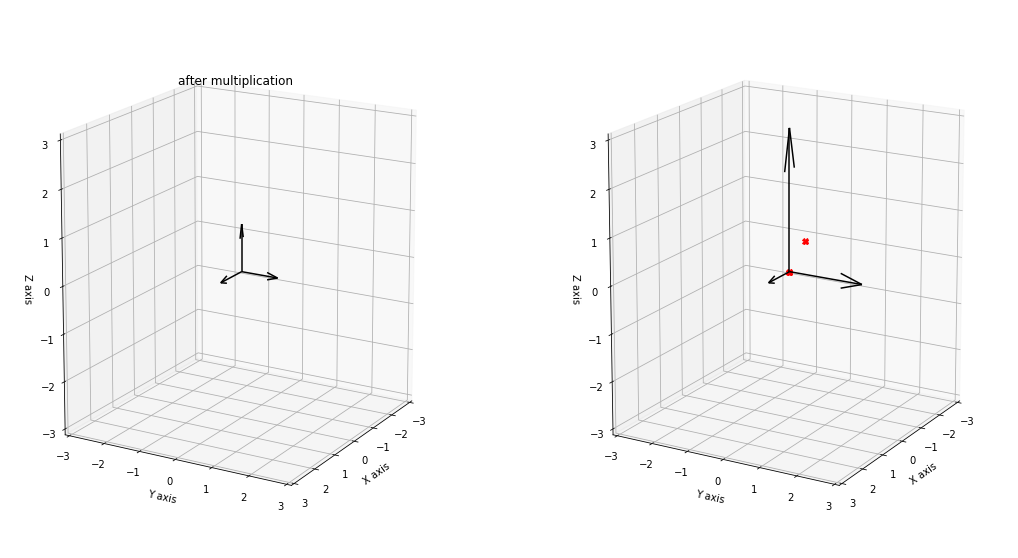

In [23]:
# plot the eigenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(121, projection = '3d')

ax1.quiver(origin, origin, origin, eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color = 'k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title("before multiplication")

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)

ax2 = fig.add_subplot(122, projection = '3d')

ax2.quiver(origin, origin, origin, new_eig[0,:], new_eig[1,:], new_eig[2,:], color = 'k')

ax2.plot((eigenvalue[0]*eigenvectors[0]), (eigenvalue[0]*eigenvectors[0]),(eigenvalue[0]*eigenvectors[0]),'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax1.set_title("after multiplication")

# show plot of the eigenvector*og matrix
plt.show()